<a href="https://colab.research.google.com/github/KauaHenSilva/python_cnn_emotion_classification/blob/master/python_cnn_emotion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup files

In [36]:
from google.colab import drive
import zipfile
import os

# drive: https://drive.google.com/drive/folders/1EUdRpr5YXNgffO9qg4pY0243__Tz5PQC
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
if not os.path.exists('fer2013'):
  with zipfile.ZipFile('/content/drive/MyDrive/Visão Computacional Guia Completo/Datasets/fer_images.zip', 'r') as zip_ref:
      zip_ref.extractall()

Base treino, base teste.

In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, MaxPooling2D, Conv2D, Flatten, BatchNormalization

In [39]:
gerador_img_treino = ImageDataGenerator(
    rescale=1./255,
    rotation_range=7,
    zoom_range=0.1,
    horizontal_flip=True,
)

gerador_img_teste = ImageDataGenerator(
    rescale=1./255
)

In [40]:
dataset_treino = gerador_img_treino.flow_from_directory(
    '/content/fer2013/train',
    target_size=(48, 48),
    batch_size=16,
    class_mode='categorical',
    shuffle=True
)

dataset_teste = gerador_img_teste.flow_from_directory(
    '/content/fer2013/validation',
    target_size=(48, 48),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [41]:
import numpy as np

In [42]:
np.unique(dataset_treino.classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6], dtype=int32),
 array([3995,  436, 4097, 7215, 4965, 4830, 3171]))

In [43]:
dataset_treino.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

### Construção e treinamento


In [44]:
numero_detectores = 32
numero_classes = 7
largura, alutura = 48,48
n_epocas = 2 # Recomendo 70

network = Sequential()

network.add(Conv2D(filters=numero_detectores, kernel_size=(3,3), input_shape=(largura, alutura, 3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))


network.add(Conv2D(filters=2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))


network.add(Conv2D(filters=2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Conv2D(filters=2*2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(Conv2D(filters=2*2*2*numero_detectores, kernel_size=(3,3), activation='relu', padding='same'))
network.add(BatchNormalization())
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.2))

network.add(Flatten())

network.add(Dense(units=2*numero_detectores, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units=2*numero_detectores, activation='relu'))
network.add(BatchNormalization())
network.add(Dropout(0.2))

network.add(Dense(units=numero_classes, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
network.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)                   │ (None, 48, 48, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 48, 48, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,328,743 (5.07 MB)

 Trainable params: 1,326,567 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

In [46]:
network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
network.fit(dataset_treino, epochs=n_epocas, validation_data=dataset_teste)

Epoch 1/2
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 96s 45ms/step - accuracy: 0.2154 - loss: 2.0491 - val_accuracy: 0.3182 - val_loss: 1.7636
Epoch 2/2
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 116s 35ms/step - accuracy: 0.3664 - loss: 1.6087 - val_accuracy: 0.4124 - val_loss: 1.5361


### Carregar e salvar modelo

Salva Modelo

In [54]:

model_json = network.to_json()
with open("/content/drive/MyDrive/Meus pesos/classificacao_emocao/model.json", "w") as json_file:
    json_file.write(model_json)

network.save_weights("/content/drive/MyDrive/Meus pesos/classificacao_emocao/model.weights.h5")

carrega modelo

In [55]:
with open('/content/drive/MyDrive/Meus pesos/classificacao_emocao/model.json', 'r') as json_file:
  json_saved_model = json_file.read()
json_saved_model

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_2", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "name": "input_layer_2"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_16", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "same", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.ini

In [56]:
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/drive/MyDrive/Meus pesos/classificacao_emocao/model.weights.h5')
network_loaded.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

### Avaliação de desempenho

In [57]:
network_loaded.evaluate(dataset_teste)

3589/3589 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.3313 - loss: 1.5913


[1.5360530614852905, 0.41237112879753113]

In [ ]:
y_pred = network_loaded.predict(dataset_teste)
y_pred = np.argmax(y_pred, axis=1)
y_true = dataset_teste.classes

<Axes: >

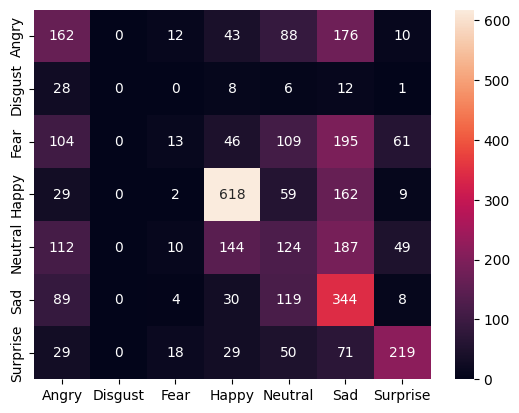

In [60]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d" , xticklabels=dataset_teste.class_indices, yticklabels=dataset_teste.class_indices)

In [62]:
print(dataset_teste.class_indices)

{'Angry': 0, 'Disgust': 1, 'Fear': 2, 'Happy': 3, 'Neutral': 4, 'Sad': 5, 'Surprise': 6}


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.29      0.33      0.31       491
           1       0.00      0.00      0.00        55
           2       0.22      0.02      0.04       528
           3       0.67      0.70      0.69       879
           4       0.22      0.20      0.21       626
           5       0.30      0.58      0.40       594
           6       0.61      0.53      0.57       416

    accuracy                           0.41      3589
   macro avg       0.33      0.34      0.32      3589
weighted avg       0.40      0.41      0.39      3589



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Classificação de uma unica imagem

In [66]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

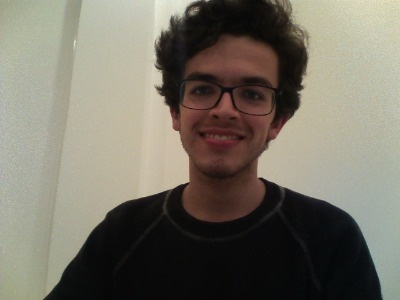

In [67]:
img = cv2.imread('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/gabriel.png')
cv2_imshow(img)

In [68]:
img.shape

(300, 400, 3)

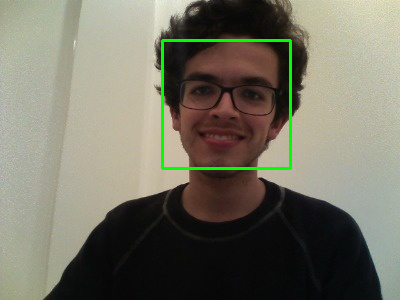

In [76]:
detector_face = cv2.CascadeClassifier('/content/drive/MyDrive/Visão Computacional Guia Completo/Cascades/haarcascade_frontalface_default.xml')
img_face = img.copy()
faces = detector_face.detectMultiScale(img_face)

for (x,y,w,h) in faces:
  cv2.rectangle(img_face, (x,y), (x+w, y+h), (0,255,0), 2)
  cv2_imshow(img_face)

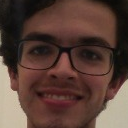

In [77]:
roi = img[y:y+h, x:x+w]
cv2_imshow(roi)

In [78]:
roi.shape

(128, 128, 3)

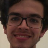

In [79]:
roi = cv2.resize(roi, (48,48))
cv2_imshow(roi)

array([[[ 28,  32,  37],
        [ 22,  28,  34],
        [ 33,  37,  42],
        ...,
        [ 12,  16,  17],
        [ 16,  21,  25],
        [ 16,  25,  30]],

       [[ 27,  31,  36],
        [ 31,  36,  41],
        [ 32,  36,  41],
        ...,
        [ 11,  16,  19],
        [ 13,  19,  24],
        [ 17,  25,  28]],

       [[ 27,  31,  36],
        [ 30,  34,  39],
        [ 26,  30,  35],
        ...,
        [ 12,  17,  20],
        [ 14,  20,  25],
        [ 20,  25,  27]],

       ...,

       [[162, 185, 197],
        [166, 188, 200],
        [166, 188, 200],
        ...,
        [162, 181, 188],
        [162, 182, 188],
        [161, 180, 187]],

       [[160, 184, 196],
        [165, 187, 199],
        [166, 188, 200],
        ...,
        [161, 180, 187],
        [162, 181, 187],
        [161, 180, 187]],

       [[160, 184, 196],
        [163, 187, 199],
        [165, 187, 199],
        ...,
        [160, 179, 186],
        [161, 180, 187],
        [162, 181, 188]]], dtype=uint8)
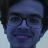

In [80]:
roi

In [83]:
roi = roi/255
roi = np.expand_dims(roi, axis=0)
roi.shape

(1, 48, 48, 3)

In [85]:
predic = network_loaded.predict(roi)
predic

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([[0.2039557 , 0.00604228, 0.06142729, 0.06179474, 0.27270633,
        0.37887114, 0.01520254]], dtype=float32)

In [86]:
previsao = np.argmax(predic)
previsao

5

In [87]:
dataset_teste.class_indices

{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

### Classificação de multiplas imagens

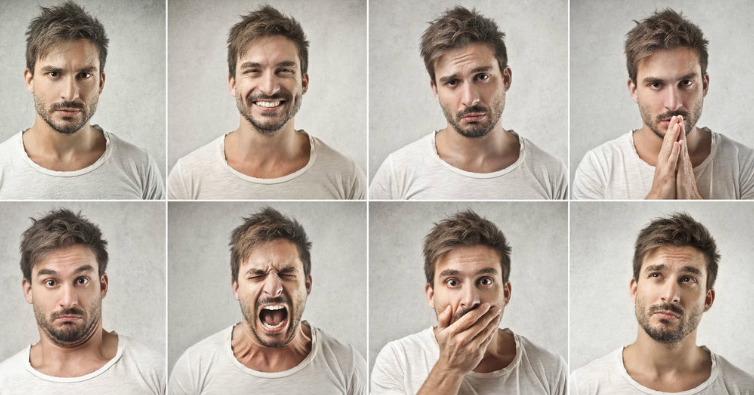

In [89]:
imagens = cv2.imread('/content/drive/MyDrive/Visão Computacional Guia Completo/Images/faces_emotions.png')
cv2_imshow(imagens)

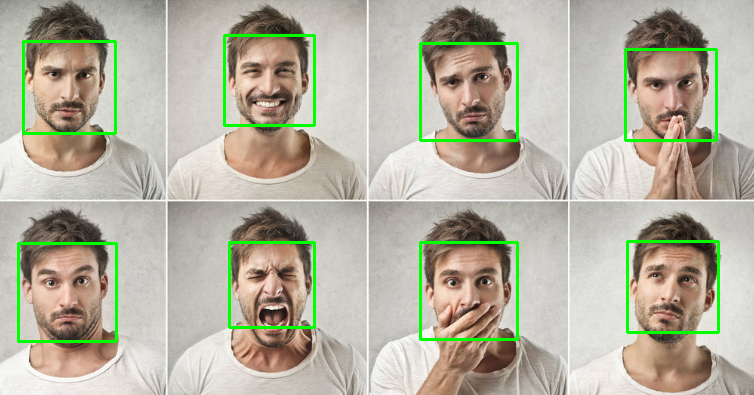

In [106]:
img = imagens.copy()
faces = detector_face.detectMultiScale(img)

for (x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0,255,0), 2)

cv2_imshow(img)

In [107]:
classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


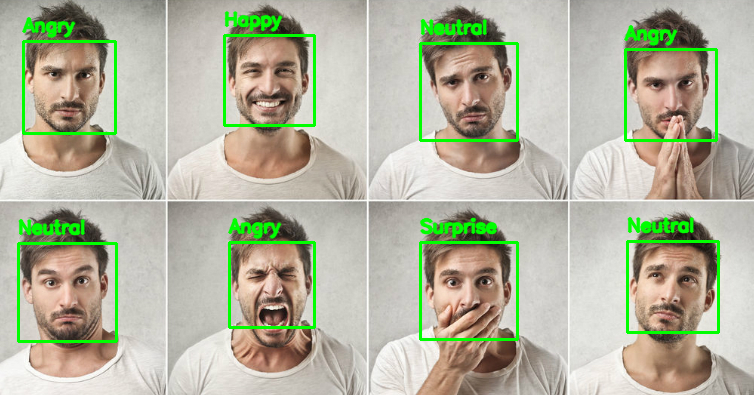

In [108]:
for (x,y,w,h) in faces:
  roi = img[y:y+h, x:x+w]
  roi = cv2.resize(roi, (48,48))
  roi = roi/255
  roi = np.expand_dims(roi, axis=0)

  predic = network_loaded.predict(roi)
  previsao = np.argmax(predic)

  cv2.putText(img, classes[previsao], (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)

cv2_imshow(img)


### Em video

In [125]:
cap = cv2.VideoCapture('/content/drive/MyDrive/Visão Computacional Guia Completo/Videos/emotion_test01.mp4')
ret, frame = cap.read()

In [126]:
if not os.path.exists('result_video'):
  os.mkdir('result_video')

save_path = '/content/result_video'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 24
out = cv2.VideoWriter(os.path.join(save_path, 'emotion_test01.mp4v'), fourcc, fps, (frame.shape[1], frame.shape[0]))

In [127]:
while cv2.waitKey(1) < 0:
  ret, frame = cap.read()

  if not ret:
    break

  deteccoes = detector_face.detectMultiScale(frame)
  if len(deteccoes) > 0:
    for (x,y,w,h) in deteccoes:
      cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)

      roi = frame[y:y+h, x:x+w]
      roi = cv2.resize(roi, (48,48))
      roi = roi/255
      roi = np.expand_dims(roi, axis=0)
      predic = network_loaded.predict(roi)
      previsao = np.argmax(predic)

      cv2.putText(frame, classes[previsao], (x,y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2, cv2.LINE_AA)

  out.write(frame)

out.release()
cap.release()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━